In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
data = files.upload()

Saving kyphosis.csv to kyphosis.csv


In [4]:
dataset = pd.read_csv("kyphosis.csv")

In [5]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
prediction = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[15  0]
 [ 5  1]]
              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        15
     present       1.00      0.17      0.29         6

    accuracy                           0.76        21
   macro avg       0.88      0.58      0.57        21
weighted avg       0.82      0.76      0.69        21



In [22]:
features = list(dataset.columns[1:])
features

['Age', 'Number', 'Start']

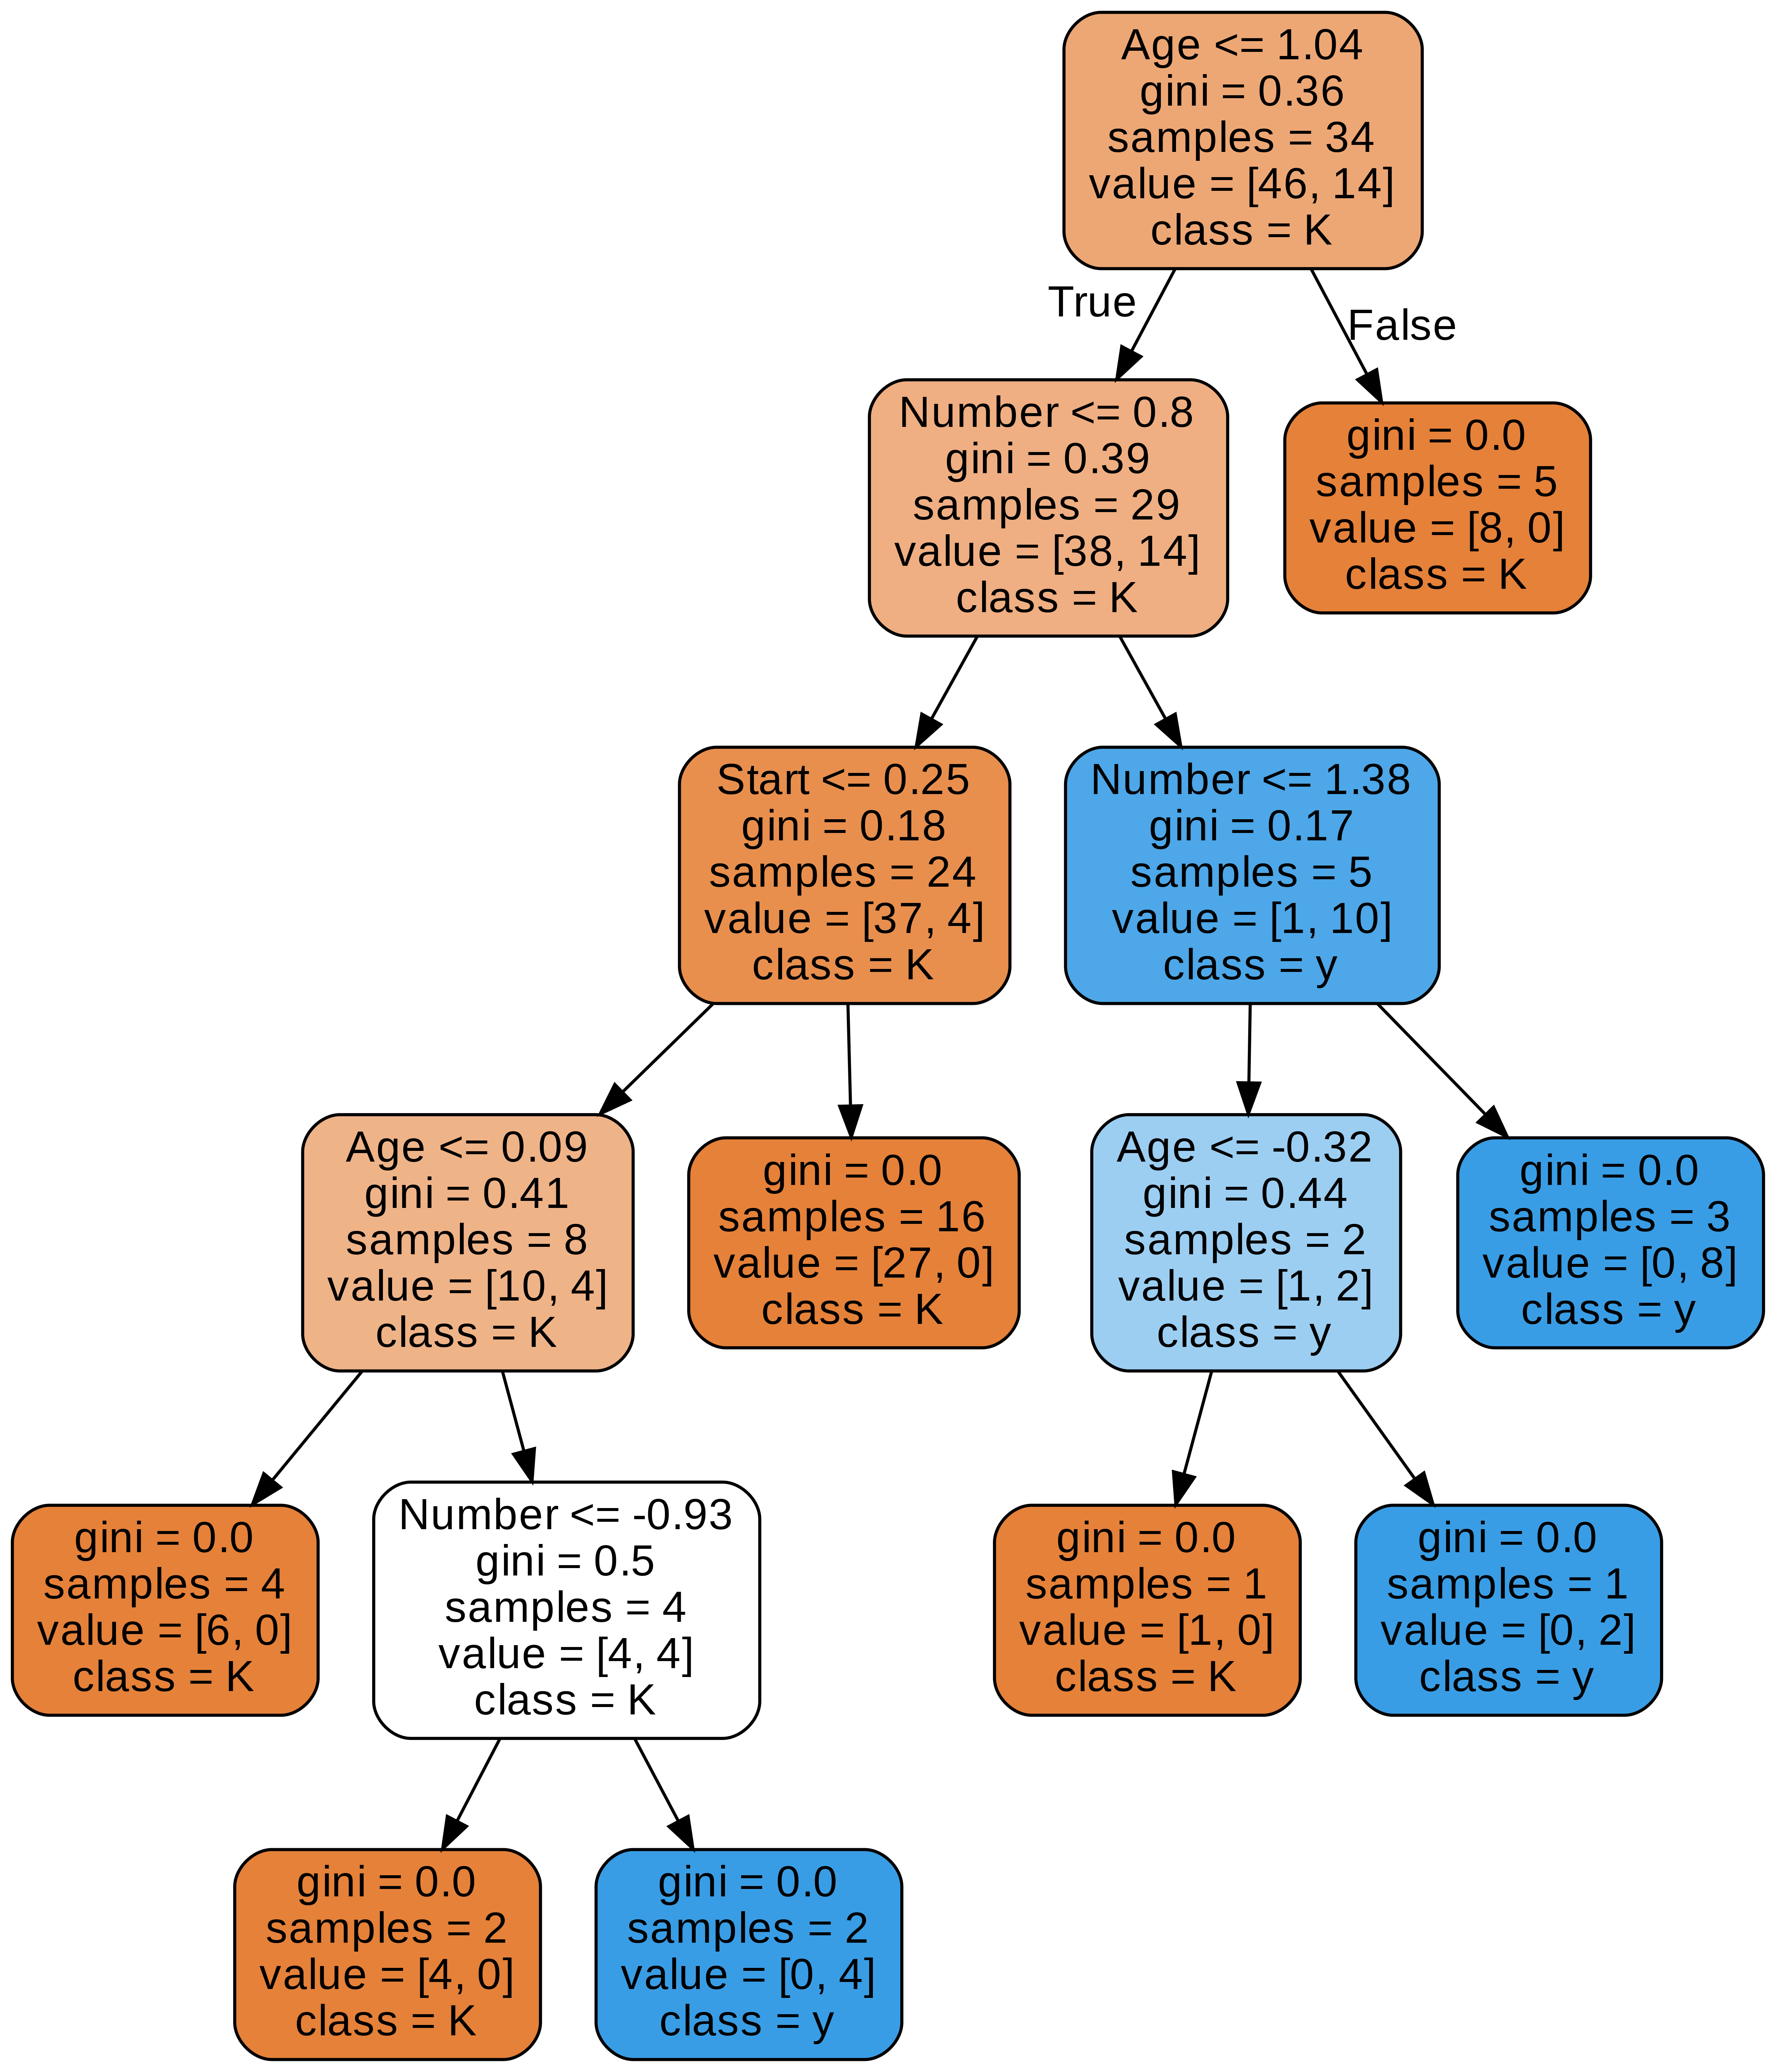

In [33]:
estimator = classifier.estimators_[55]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = 'Kyphosis',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
